<a href="https://colab.research.google.com/github/alortiz05/DDDS-Cohort-16-Projects/blob/main/Project2_Housing_AmberOrtiz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 2: Housing Price Prediction


The project should be done using Regression prediction techniques ( with feature scaling and regularization ) as covered in class.
The goal is to minimize the RMS ***percentage*** error ( root mean squared percentage error - RMSPE ) on your prediction of the house sales price.



Any of the available features can be used in the regression, but a minimum set of variables that do the job should be the ultimate goal.



Be sure to go through the whole data science process and document as such in your Jupyter notebook.



This project will have less direct "To Do" guidance and the progression through the data science process will be more individualized this time around.
We will talk about all the issues during class so you're not going to be out on a ledge with this one, I just want to move you towards performing a data science project on your own eventually.



A data dictionary file is available at AWS S3 at [Housing Data Dictionary]( https://ddc-datascience.s3.amazonaws.com/Projects/Project.2-Housing/Housing%20-%20Data%20Documentation.pdf ).

The data is available on AWS S3 at https://ddc-datascience.s3.amazonaws.com/Projects/Project.2-Housing/Data/Housing.Data.csv .


# Regression Techniques used to Predict Home Sales Prices

**Deep Dive Coding Data Science Bootcamp Project 1**

---
Amber Ortiz - March 10, 2025


## Problem Definition


The goal is to take housing data to predict home sales prices while minimizing the root mean squared percentage (RMSPE). This project will utilize regression techniques.  

## Data Collection/Sources

### Data Overview

This data comes from [AWS S3](https://ddc-datascience.s3.amazonaws.com/Projects/Project.2-Housing/Data/Housing.Data.csv ).

The housing dataset includes information for each home by project improvement district (PID) identification.

There are 81 fields for each of the 2637 PID indentifiers.


###Imports

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets, metrics, model_selection
from sklearn import model_selection
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

from sklearn import preprocessing
import matplotlib
import seaborn as sns
matplotlib.style.use('ggplot')

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

import statsmodels.api as sm

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error,fbeta_score, make_scorer
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler


###File Paths

File path for train and test data

In [49]:
project2='https://ddc-datascience.s3.amazonaws.com/Projects/Project.2-Housing/Data/Housing.Data.csv'

In [50]:
project_data = pd.read_csv(project2)
project_data.head()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,905101070,20,RL,62.0,14299,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,7,2007,WD,Normal,115400
1,905101330,90,RL,72.0,10791,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,Shed,500,10,2006,WD,Normal,90000
2,903454090,50,RM,50.0,9000,Pave,NaN,Reg,Bnk,AllPub,...,0,NaN,NaN,NaN,0,12,2007,WD,Normal,141000
3,533244030,60,FV,68.0,7379,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,254000
4,909252020,70,RL,60.0,7200,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,4,2009,WD,Normal,155000


##Data Cleaning

- There appear to be many columns with NaNs.
  - These need to be removed prior to running regression
- Threre also appear to be many duplicate values
  - Regresssion may bennefit from the removal of these data.


In [51]:
len(project_data) #will provide me with the number of rows in my data set

2637

In [52]:
project_data.shape #how many rows and columns

(2637, 81)

In [53]:
project_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2637 entries, 0 to 2636
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PID              2637 non-null   int64  
 1   MS SubClass      2637 non-null   int64  
 2   MS Zoning        2637 non-null   object 
 3   Lot Frontage     2188 non-null   float64
 4   Lot Area         2637 non-null   int64  
 5   Street           2637 non-null   object 
 6   Alley            180 non-null    object 
 7   Lot Shape        2637 non-null   object 
 8   Land Contour     2637 non-null   object 
 9   Utilities        2637 non-null   object 
 10  Lot Config       2637 non-null   object 
 11  Land Slope       2637 non-null   object 
 12  Neighborhood     2637 non-null   object 
 13  Condition 1      2637 non-null   object 
 14  Condition 2      2637 non-null   object 
 15  Bldg Type        2637 non-null   object 
 16  House Style      2637 non-null   object 
 17  Overall Qual  

Reviewing info function results we can see that 26 of the features contain NaN and in most of these cases its a significant number.

We also see that this dataset is currently utilizing 1.6+MB.

We can also see that our data set consists of integers, floats, (38 numbers)  and objects (43). When reviewing the data we will need to account for the prescence of objects which in many functions are ignored. If these values do need to be maintained in the data set we may need to convert them to a number.

In [54]:
project_data.describe(include='all') #get summary statistics for each column

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
count,2.637000e+03,2637.000000,2637,2188.000000,2637.000000,2637,180,2637,2637,2637,...,2637.000000,11,528,96,2637.000000,2637.000000,2637.000000,2637,2637,2637.000000
unique,NaN,NaN,7,NaN,NaN,2,2,4,4,3,...,NaN,4,4,4,NaN,NaN,NaN,10,6,NaN
top,NaN,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,AllPub,...,NaN,Gd,MnPrv,Shed,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,NaN,2043,NaN,NaN,2625,111,1662,2365,2634,...,NaN,4,306,87,NaN,NaN,NaN,2286,2166,NaN
mean,7.141301e+08,57.349261,NaN,69.166819,10044.694729,NaN,NaN,NaN,NaN,NaN,...,2.130072,NaN,NaN,NaN,42.014031,6.243838,2007.795601,NaN,NaN,179986.230186
std,1.887527e+08,42.499091,NaN,23.356779,6742.549521,NaN,NaN,NaN,NaN,NaN,...,35.140140,NaN,NaN,NaN,393.158781,2.722093,1.306403,NaN,NaN,78309.251522
min,5.263011e+08,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,1.000000,2006.000000,NaN,NaN,12789.000000
25%,5.284770e+08,20.000000,NaN,58.000000,7436.000000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,4.000000,2007.000000,NaN,NaN,129500.000000
50%,5.354530e+08,50.000000,NaN,68.000000,9450.000000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,6.000000,2008.000000,NaN,NaN,160000.000000
75%,9.071870e+08,70.000000,NaN,80.000000,11526.000000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,8.000000,2009.000000,NaN,NaN,213000.000000


Because we have object data type we use the paramter include = 'all'. This inclusion will allow us to see the statistical data for no numerical features.

### Check for ALL null values

In [55]:
#check for NAs per feature
project2_clean = project_data.copy()
project2_clean_list = [] #empty list to create df with all the features that have null values
for i in project2_clean.columns:
  null_count =project2_clean[i].isnull().sum()
  if null_count > 0:
    project2_clean_list.append((i,null_count))
  #df=project2_clean[i].isnull().sum()
project2_clean_list
df=pd.DataFrame(project2_clean_list, columns = ['Features','Null Count'])
df
#turning this funciton into a loop will allow me to print only the columns that have nulls in them and how many there are

,Features,Null Count
0,Lot Frontage,449
1,Alley,2457
2,Mas Vnr Type,1607
3,Mas Vnr Area,23
4,Bsmt Qual,73
5,Bsmt Cond,73
6,Bsmt Exposure,76
7,BsmtFin Type 1,73
8,BsmtFin SF 1,1
9,BsmtFin Type 2,74


In [56]:
# Divide the Null Count column by the length (2637) of project_data and times by 100 to get the %Null per total for each feature
df['Null Percent'] = df['Null Count'] / len(project_data) * 100
df

,Features,Null Count,Null Percent
0,Lot Frontage,449,17.026925
1,Alley,2457,93.174061
2,Mas Vnr Type,1607,60.940463
3,Mas Vnr Area,23,0.872203
4,Bsmt Qual,73,2.768297
5,Bsmt Cond,73,2.768297
6,Bsmt Exposure,76,2.882063
7,BsmtFin Type 1,73,2.768297
8,BsmtFin SF 1,1,0.037922
9,BsmtFin Type 2,74,2.806219


For columns where greater then 50% of the data is null these data will likly not contribute to fitting the model.

In [57]:
df['Null Percent Int']=df['Null Percent'].astype(int)
df

,Features,Null Count,Null Percent,Null Percent Int
0,Lot Frontage,449,17.026925,17
1,Alley,2457,93.174061,93
2,Mas Vnr Type,1607,60.940463,60
3,Mas Vnr Area,23,0.872203,0
4,Bsmt Qual,73,2.768297,2
5,Bsmt Cond,73,2.768297,2
6,Bsmt Exposure,76,2.882063,2
7,BsmtFin Type 1,73,2.768297,2
8,BsmtFin SF 1,1,0.037922,0
9,BsmtFin Type 2,74,2.806219,2


####Remove col with >50% null

In [58]:
null_feature = df[df['Null Percent Int']>50].index
null_feature

for i in null_feature:
  df2= print(df['Features'][i])

df2a=pd.DataFrame(data=df2)
df2a.astype(str)
df2b=df2a.values.tolist()
df2b

Alley
Mas Vnr Type
Pool QC
Fence
Misc Feature


[]

In [59]:
project2_cleaned = project_data.drop(columns=['Alley','Mas Vnr Type','Pool QC','Fence','Misc Feature'])
project2_cleaned.head()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,...,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,905101070,20,RL,62.0,14299,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,7,2007,WD,Normal,115400
1,905101330,90,RL,72.0,10791,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,500,10,2006,WD,Normal,90000
2,903454090,50,RM,50.0,9000,Pave,Reg,Bnk,AllPub,Inside,...,0,0,126,0,0,12,2007,WD,Normal,141000
3,533244030,60,FV,68.0,7379,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,4,2010,WD,Normal,254000
4,909252020,70,RL,60.0,7200,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,4,2009,WD,Normal,155000


We have now gone from 81 columns of data to 76 columns of data. This has significantly clean up the data. But we still have columns that have nulls.

---



### Check for Zero values


In [60]:
project2_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2637 entries, 0 to 2636
Data columns (total 76 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PID              2637 non-null   int64  
 1   MS SubClass      2637 non-null   int64  
 2   MS Zoning        2637 non-null   object 
 3   Lot Frontage     2188 non-null   float64
 4   Lot Area         2637 non-null   int64  
 5   Street           2637 non-null   object 
 6   Lot Shape        2637 non-null   object 
 7   Land Contour     2637 non-null   object 
 8   Utilities        2637 non-null   object 
 9   Lot Config       2637 non-null   object 
 10  Land Slope       2637 non-null   object 
 11  Neighborhood     2637 non-null   object 
 12  Condition 1      2637 non-null   object 
 13  Condition 2      2637 non-null   object 
 14  Bldg Type        2637 non-null   object 
 15  House Style      2637 non-null   object 
 16  Overall Qual     2637 non-null   int64  
 17  Overall Cond  

The following only have a single NaN I should be able to remove those. BsmtFin SF 1, BsmtFin SF 2, Bsmt Unf SF 1, Total Bsmt SF 1, Bsmt Full Bath 2, Bsmt Half Bath 2, Garage Cars, Garage Area

In [61]:
zeros = pd.DataFrame(project2_cleaned.copy())

# Find columns that contain any zero values
columns_with_zeros = zeros.columns[(zeros == 0).any()]
columns_with_zeros
# Sum the number of zero values in those columns
zeros_sum = (zeros[columns_with_zeros] == 0).sum()


zeros_sum


,0
Mas Vnr Area,1580
BsmtFin SF 1,840
BsmtFin SF 2,2317
Bsmt Unf SF,219
Total Bsmt SF,72
2nd Flr SF,1505
Low Qual Fin SF,2602
Bsmt Full Bath,1534
Bsmt Half Bath,2483
Full Bath,11


In [62]:
#determine the features that have > 50% Zero Values
df0=pd.DataFrame(zeros_sum)
df.index.name='Features'
df0.columns=['Zero Count']
df0['Zero Percent'] = df0['Zero Count'] / len(project_data) * 100
df0['Zero Percent Int']=df0['Zero Percent'].astype(int)
df0

zero_feature = df0[df0['Zero Percent Int']>50].index
zero_feature=pd.DataFrame(zero_feature)
zero_feature.columns=['Features']
zero_feature

df2a=pd.DataFrame(data=zero_feature)
df2a



,Features
0,Mas Vnr Area
1,BsmtFin SF 2
2,2nd Flr SF
3,Low Qual Fin SF
4,Bsmt Full Bath
5,Bsmt Half Bath
6,Half Bath
7,Wood Deck SF
8,Enclosed Porch
9,3Ssn Porch


####Remove col with >50% *zero*

In [63]:
#lets drop the columns that are mostly zero
columns_to_drop=df2a['Features'].tolist()
# Check if columns to drop exist in the DataFrame
columns_to_drop = [col for col in columns_to_drop if col in project2_cleaned.columns]

# Drop the columns if they exist
project2_cleaned1 = project2_cleaned.drop(columns=columns_to_drop)

# Print the resulting DataFrame
project2_cleaned1

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,...,Garage Area,Garage Qual,Garage Cond,Paved Drive,Open Porch SF,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,905101070,20,RL,62.0,14299,Pave,Reg,Lvl,AllPub,Inside,...,440.0,TA,TA,N,0,7,2007,WD,Normal,115400
1,905101330,90,RL,72.0,10791,Pave,Reg,Lvl,AllPub,Inside,...,516.0,TA,TA,Y,0,10,2006,WD,Normal,90000
2,903454090,50,RM,50.0,9000,Pave,Reg,Bnk,AllPub,Inside,...,544.0,TA,TA,P,162,12,2007,WD,Normal,141000
3,533244030,60,FV,68.0,7379,Pave,IR1,Lvl,AllPub,Inside,...,592.0,TA,TA,Y,184,4,2010,WD,Normal,254000
4,909252020,70,RL,60.0,7200,Pave,Reg,Lvl,AllPub,Inside,...,576.0,TA,TA,Y,0,4,2009,WD,Normal,155000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2632,903231070,50,RM,52.0,6240,Pave,Reg,Lvl,AllPub,Inside,...,528.0,TA,TA,Y,0,9,2006,WD,Normal,114500
2633,906201021,80,RL,74.0,10778,Pave,IR1,Lvl,AllPub,Inside,...,462.0,TA,TA,Y,36,7,2009,WD,Normal,162000
2634,533253070,120,RL,61.0,3782,Pave,IR1,Lvl,AllPub,CulDSac,...,484.0,TA,TA,Y,78,9,2009,WD,Normal,211500
2635,527376100,20,RL,78.0,10140,Pave,Reg,Lvl,AllPub,Inside,...,478.0,TA,TA,Y,0,8,2009,WD,Normal,165000


###Check for repetative data



In [64]:
#I want to use the .describe prodced dataframe to find columns that are >50% the same value as there would be little variation to build a model on
desc=pd.DataFrame(project2_cleaned1.describe(include='all'))
desc1=desc.transpose()
desc1


# Pull top and freq columns where freq > 1318


desc2 = desc1.loc[:, ['top', 'freq']]

# Now filter where freq > 1318
result = desc2[desc2['freq'] > 1318]
result
print(result.index)


Index(['MS Zoning', 'Street', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Condition 1', 'Condition 2', 'Bldg Type',
       'House Style', 'Roof Style', 'Roof Matl', 'Exter Qual', 'Exter Cond',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 2', 'Heating', 'Heating QC',
       'Central Air', 'Electrical', 'Kitchen Qual', 'Functional',
       'Garage Type', 'Garage Qual', 'Garage Cond', 'Paved Drive', 'Sale Type',
       'Sale Condition'],
      dtype='object')


Based on the describe function:
Top is the most frequent in that column and freq is the number of that most frequent value.

Thus, the index values above can likely be dropped as ~50% of each column is the same.

####Remove col with >50% repeat values

In [65]:
#project2_cleaned1 = project2_cleaned1.drop(result.index)

project2_cleaned1 = project2_cleaned1.drop(columns=result.index)

# Verify that columns are dropped
project2_cleaned1




,PID,MS SubClass,Lot Frontage,Lot Area,Neighborhood,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Exterior 1st,...,Fireplaces,Fireplace Qu,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Open Porch SF,Mo Sold,Yr Sold,SalePrice
0,905101070,20,62.0,14299,Sawyer,4,3,1964,1964,HdBoard,...,0,NaN,1964.0,Unf,2.0,440.0,0,7,2007,115400
1,905101330,90,72.0,10791,Sawyer,4,5,1967,1967,MetalSd,...,0,NaN,1967.0,Unf,2.0,516.0,0,10,2006,90000
2,903454090,50,50.0,9000,IDOTRR,6,6,1937,1950,Wd Sdng,...,1,Gd,1979.0,Unf,1.0,544.0,162,12,2007,141000
3,533244030,60,68.0,7379,Somerst,8,5,2000,2000,VinylSd,...,1,TA,2000.0,RFn,2.0,592.0,184,4,2010,254000
4,909252020,70,60.0,7200,SWISU,7,9,1936,2007,Wd Sdng,...,0,NaN,1971.0,RFn,2.0,576.0,0,4,2009,155000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2632,903231070,50,52.0,6240,BrkSide,6,6,1934,1950,Wd Sdng,...,1,Gd,1985.0,Unf,2.0,528.0,0,9,2006,114500
2633,906201021,80,74.0,10778,SawyerW,7,6,1990,1991,HdBoard,...,0,NaN,1990.0,Unf,2.0,462.0,36,7,2009,162000
2634,533253070,120,61.0,3782,Greens,8,5,1981,1981,Wd Sdng,...,2,TA,1981.0,Fin,2.0,484.0,78,9,2009,211500
2635,527376100,20,78.0,10140,NWAmes,6,5,1974,1974,HdBoard,...,1,TA,1974.0,RFn,2.0,478.0,0,8,2009,165000


###Remove remainder of nulls based on inquiry

In [66]:
project2_cleaned1= project2_cleaned1.drop(columns=['Lot Frontage', 'Fireplace Qu','BsmtFin Type 1','Bsmt Qual', 'Garage Finish']) #this data does not seem super important to me



In [67]:
project2_cleaned1 = project2_cleaned1.dropna(subset=['BsmtFin SF 1', 'Bsmt Unf SF','Total Bsmt SF', 'Garage Cars', 'Garage Area'])# there is only one of each of these we could just remove the whole row.

In [68]:
project2_cleaned1['Garage Yr Blt'] = project2_cleaned1['Garage Yr Blt'].fillna(project2_cleaned1['Garage Yr Blt'].mean()) #this will fill the NAs with the average year built


In [69]:
#Will use the to keep checking Nulls as I progressed above
for i in project2_cleaned1:
  null_count =project2_cleaned1[i].isnull().sum()
  if null_count > 0:
    col=print(i,null_count)
    col=pd.DataFrame(data=col)
    col.values.tolist()
    col



At this point we should have zero nulls as stated above

##Exploratory Data Analysis

- I believe we have supervised learning model because we have input data (the features of the house) and output data (sale price).
- We will be predicting the sales of future homes and thus we are looking at a regression model.
- Our 'Target' is the home sales price, right now the distribution of our Target is a semi-normal distribution that is skewed to the left.

### Data Visualization

In [70]:
project2_cleaned1 = pd.DataFrame(project2_cleaned1)

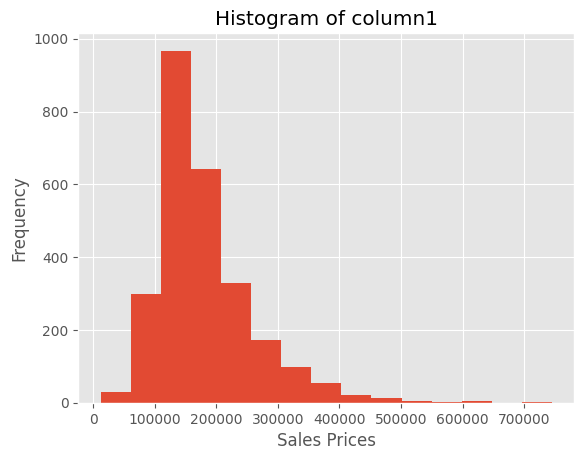

In [71]:
# Plot histogram for 'target'
project2_cleaned1['SalePrice'].hist(bins=15)  # You can adjust the number of bins
plt.xlabel('Sales Prices')
plt.ylabel('Frequency')
plt.title('Histogram of column1')
plt.show()

we see a semni normal distribution of our sales prices but with a skew to the left.

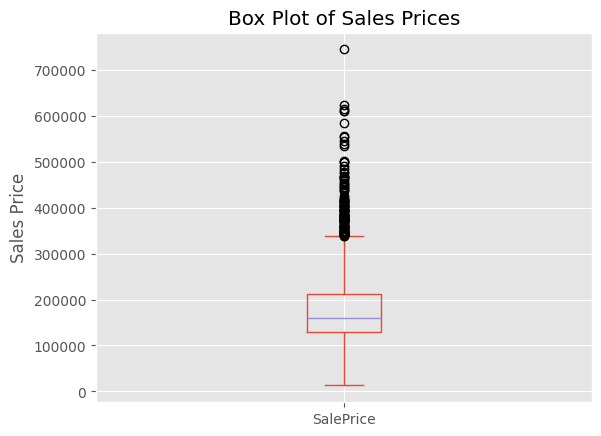

In [72]:
# Box plot for sales prices
project2_cleaned1['SalePrice'].plot(kind='box')
plt.ylabel('Sales Price')
plt.title('Box Plot of Sales Prices')
plt.show()

### Skewed Data Visualizaton

1.642293554723221


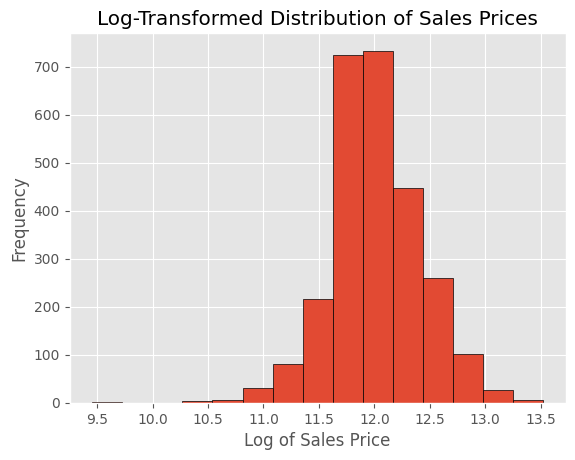

In [73]:
# Check for skewness of sales prices
print(project2_cleaned1['SalePrice'].skew())

#The log plot is suggested to be used for plottiing skewed data
project2_cleaned1['Log Sales Price'] = np.log(project2_cleaned1['SalePrice'])

# Plot the log-transformed sales prices
project2_cleaned1['Log Sales Price'].hist(bins=15, edgecolor='black')
plt.xlabel('Log of Sales Price')
plt.ylabel('Frequency')
plt.title('Log-Transformed Distribution of Sales Prices')
plt.show()

I found this equation to determine if there is indeed a skewness to the graph. As as you can see this pos value above 1 shows a long tail to the right towards high sales prices.

Utilizing the log-transformed sales prices we are able to plot our data in a more normal distribution.

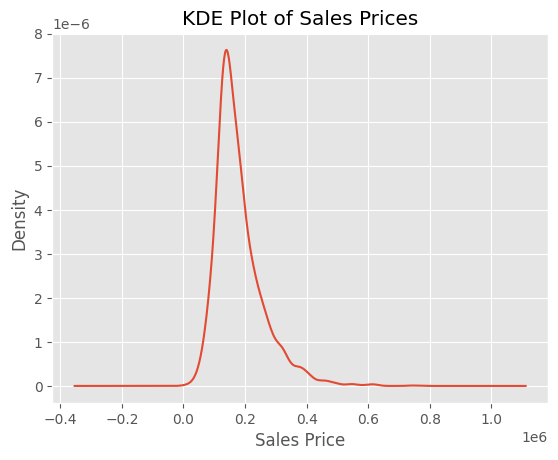

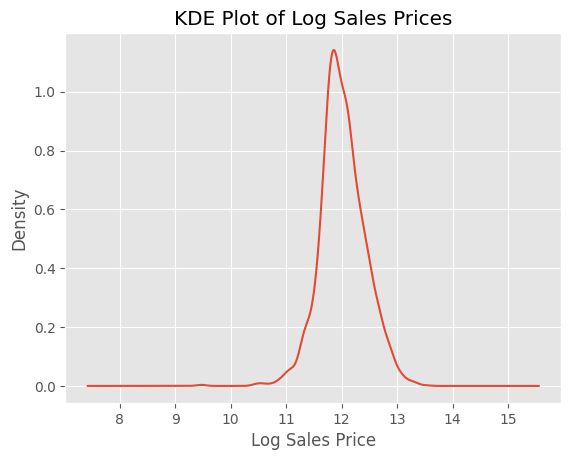

In [74]:
# KDE plot for sales prices, this willl show us a smoothed plot of the histogra
project2_cleaned1['SalePrice'].plot(kind='kde')
plt.xlabel('Sales Price')
plt.title('KDE Plot of Sales Prices')
plt.show()

project2_cleaned1['Log Sales Price'].plot(kind='kde')
plt.xlabel('Log Sales Price')
plt.title('KDE Plot of Log Sales Prices')
plt.show()

The plot shows us that our averge home sales is aroun 150k but as you can see there are a large number of outliers from 325-780K. This may explain the skew of our histogram towards the high end. I will go back and update the histrogram with more bins too pull this out.

### Data Correlation

In [75]:
project2_cleaned1

,PID,MS SubClass,Lot Area,Neighborhood,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Exterior 1st,Exterior 2nd,...,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Open Porch SF,Mo Sold,Yr Sold,SalePrice,Log Sales Price
0,905101070,20,14299,Sawyer,4,3,1964,1964,HdBoard,HdBoard,...,5,0,1964.0,2.0,440.0,0,7,2007,115400,11.656160
1,905101330,90,10791,Sawyer,4,5,1967,1967,MetalSd,MetalSd,...,6,0,1967.0,2.0,516.0,0,10,2006,90000,11.407565
2,903454090,50,9000,IDOTRR,6,6,1937,1950,Wd Sdng,Wd Sdng,...,6,1,1979.0,1.0,544.0,162,12,2007,141000,11.856515
3,533244030,60,7379,Somerst,8,5,2000,2000,VinylSd,VinylSd,...,7,1,2000.0,2.0,592.0,184,4,2010,254000,12.445090
4,909252020,70,7200,SWISU,7,9,1936,2007,Wd Sdng,Wd Sdng,...,6,0,1971.0,2.0,576.0,0,4,2009,155000,11.951180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2632,903231070,50,6240,BrkSide,6,6,1934,1950,Wd Sdng,Wd Sdng,...,6,1,1985.0,2.0,528.0,0,9,2006,114500,11.648330
2633,906201021,80,10778,SawyerW,7,6,1990,1991,HdBoard,HdBoard,...,4,0,1990.0,2.0,462.0,36,7,2009,162000,11.995352
2634,533253070,120,3782,Greens,8,5,1981,1981,Wd Sdng,Plywood,...,4,2,1981.0,2.0,484.0,78,9,2009,211500,12.261980
2635,527376100,20,10140,NWAmes,6,5,1974,1974,HdBoard,HdBoard,...,7,1,1974.0,2.0,478.0,0,8,2009,165000,12.013701


In [76]:
# Identify numerical columns
numerical_cols = project2_cleaned1.select_dtypes(include=['number']).columns.tolist()

# Identify categorical columns
categorical_cols = project2_cleaned1.select_dtypes(include=['object', 'category']).columns.tolist()

print("Numerical columns:", numerical_cols)
print("Categorical columns:", categorical_cols)

Numerical columns: ['PID', 'MS SubClass', 'Lot Area', 'Overall Qual', 'Overall Cond', 'Year Built', 'Year Remod/Add', 'BsmtFin SF 1', 'Bsmt Unf SF', 'Total Bsmt SF', '1st Flr SF', 'Gr Liv Area', 'Full Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd', 'Fireplaces', 'Garage Yr Blt', 'Garage Cars', 'Garage Area', 'Open Porch SF', 'Mo Sold', 'Yr Sold', 'SalePrice', 'Log Sales Price']
Categorical columns: ['Neighborhood', 'Exterior 1st', 'Exterior 2nd', 'Foundation']


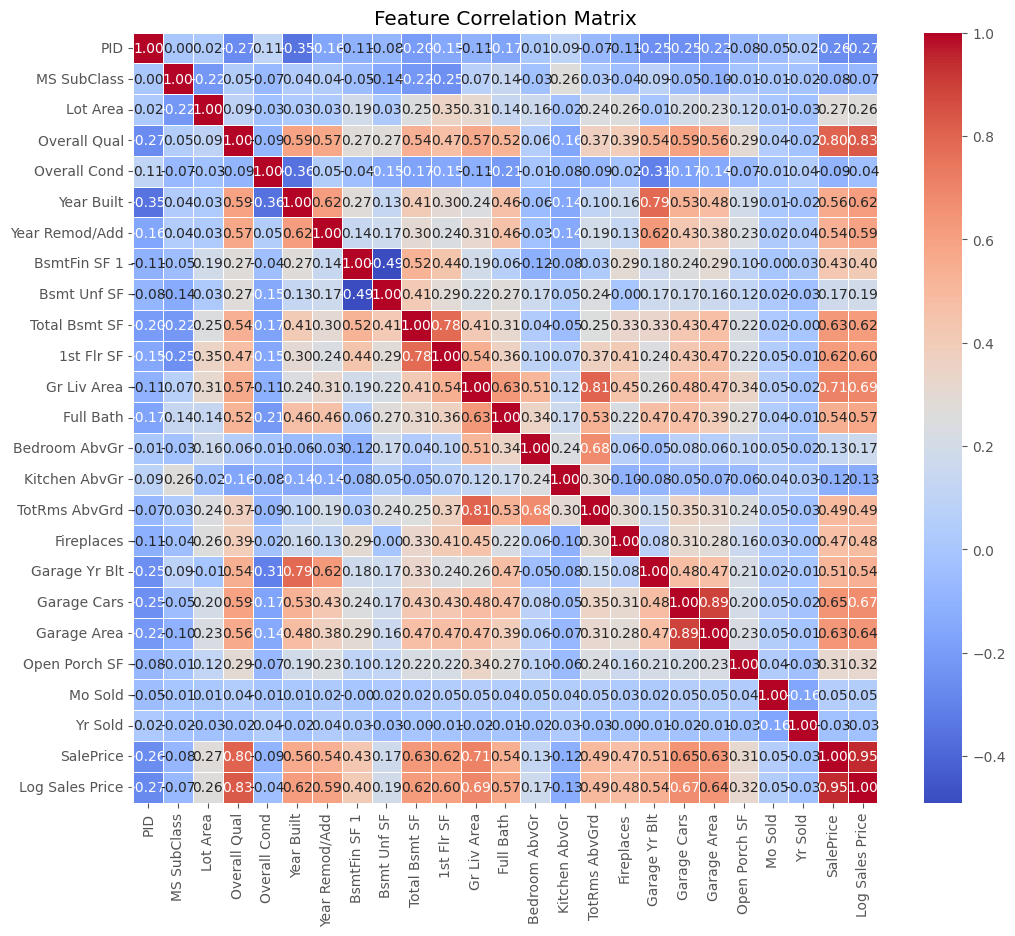

In [77]:
# Correlation matrix for numerical features
numerical_data = project2_cleaned1.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numerical_data.corr()


plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Feature Correlation Matrix')
plt.show()

We can use One-Hot Encoding to create binary features for our categorical columns and then look at the correlation matrix with them.

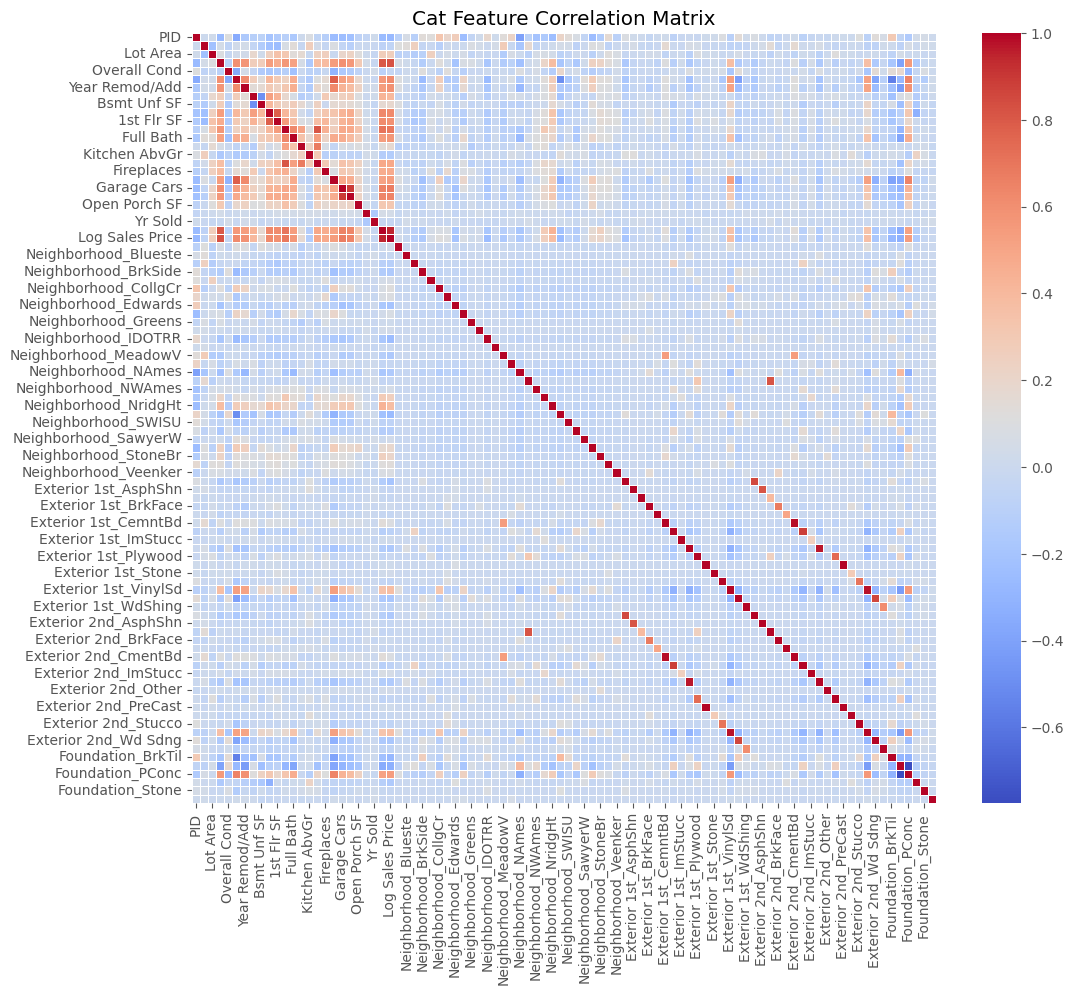

In [78]:
# One-Hot Encoding for a categorical feature
project2_cleaned1_CatEncoded = pd.get_dummies(project2_cleaned1, columns=['Neighborhood', 'Exterior 1st', 'Exterior 2nd', 'Foundation'])

correlation_matrix2 = project2_cleaned1_CatEncoded.corr()


plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix2, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Cat Feature Correlation Matrix')
plt.show()

I found a discussion for comparing categorical and numerical data in a plot called "point biserial correlation" https://www.reddit.com/r/MachineLearning/comments/12gpgd/correlation_between_numerical_and_categorical_data/?rdt=63068

Probalby the only feature that might be of interest for this woudl be the Neighborhood categorical feature. This did not work because the Neighborhood feature contains more then one feature. Thus I am going to try simple ANOVA.

In [79]:
from scipy import stats

# Perform ANOVA for each one-hot encoded neighborhood column

# Create a list of columns that represent the neighborhood columns
neighborhood_columns = [col for col in project2_cleaned1_CatEncoded.columns if 'Neighborhood' in col]
print(neighborhood_columns)
# Perform ANOVA for each neighborhood category
f_stat, p_value = stats.f_oneway(
    *[project2_cleaned1_CatEncoded[project2_cleaned1_CatEncoded[col] == 1]['SalePrice'] for col in neighborhood_columns]
)

# Output the results
print(f'F-statistic: {f_stat}, p-value: {p_value}')

['Neighborhood_Blmngtn', 'Neighborhood_Blueste', 'Neighborhood_BrDale', 'Neighborhood_BrkSide', 'Neighborhood_ClearCr', 'Neighborhood_CollgCr', 'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_Gilbert', 'Neighborhood_Greens', 'Neighborhood_GrnHill', 'Neighborhood_IDOTRR', 'Neighborhood_Landmrk', 'Neighborhood_MeadowV', 'Neighborhood_Mitchel', 'Neighborhood_NAmes', 'Neighborhood_NPkVill', 'Neighborhood_NWAmes', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_OldTown', 'Neighborhood_SWISU', 'Neighborhood_Sawyer', 'Neighborhood_SawyerW', 'Neighborhood_Somerst', 'Neighborhood_StoneBr', 'Neighborhood_Timber', 'Neighborhood_Veenker']
F-statistic: 135.10897615098145, p-value: 0.0


When the F-stat value is large then the columns are very different and the varience is high. A high value tends to be above one. And the p-value would suggest that this is very statistcally significant. This could suggest there is a strong correlation between the categorical feature and the numerical featuer i.e. Sales Price.

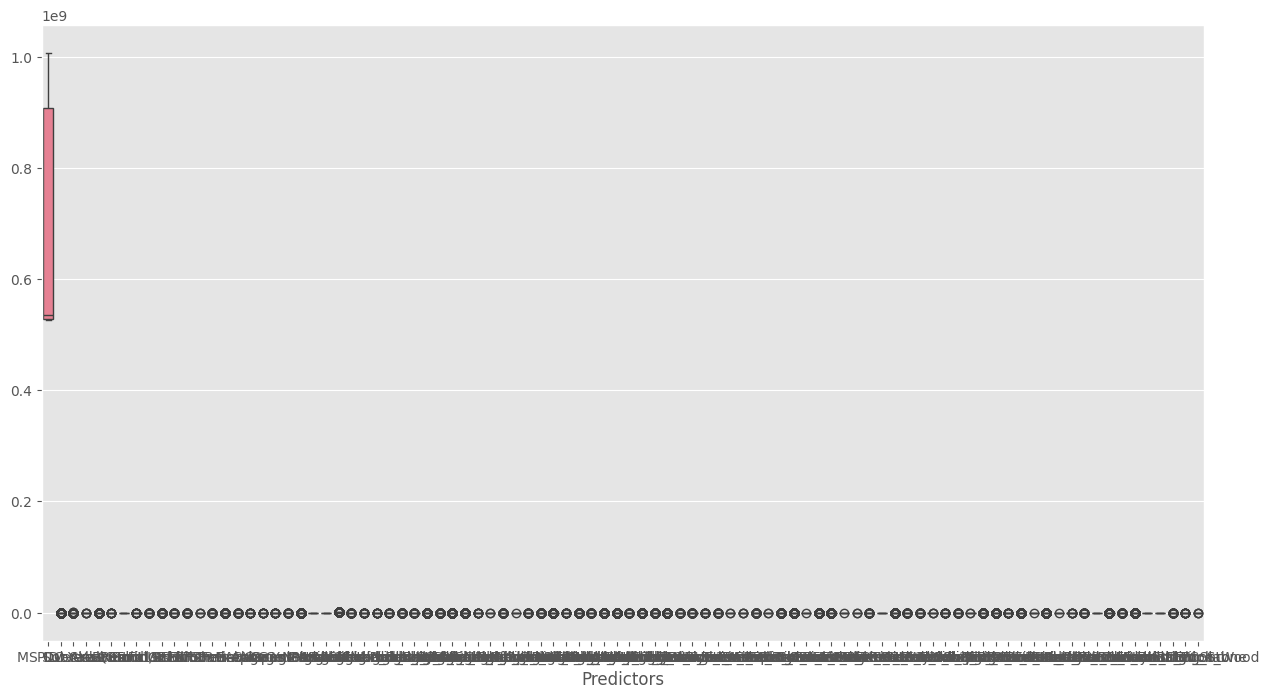

In [80]:
# Boxplot for a random column
plt.figure(figsize=(15, 8))
sns.boxplot(data=project2_cleaned1_CatEncoded, orient='v')
plt.xlabel('Predictors')
plt.xticks()
plt.show()

##Data Processing

##Regression

In [81]:
project2_cleaned1

,PID,MS SubClass,Lot Area,Neighborhood,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Exterior 1st,Exterior 2nd,...,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Open Porch SF,Mo Sold,Yr Sold,SalePrice,Log Sales Price
0,905101070,20,14299,Sawyer,4,3,1964,1964,HdBoard,HdBoard,...,5,0,1964.0,2.0,440.0,0,7,2007,115400,11.656160
1,905101330,90,10791,Sawyer,4,5,1967,1967,MetalSd,MetalSd,...,6,0,1967.0,2.0,516.0,0,10,2006,90000,11.407565
2,903454090,50,9000,IDOTRR,6,6,1937,1950,Wd Sdng,Wd Sdng,...,6,1,1979.0,1.0,544.0,162,12,2007,141000,11.856515
3,533244030,60,7379,Somerst,8,5,2000,2000,VinylSd,VinylSd,...,7,1,2000.0,2.0,592.0,184,4,2010,254000,12.445090
4,909252020,70,7200,SWISU,7,9,1936,2007,Wd Sdng,Wd Sdng,...,6,0,1971.0,2.0,576.0,0,4,2009,155000,11.951180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2632,903231070,50,6240,BrkSide,6,6,1934,1950,Wd Sdng,Wd Sdng,...,6,1,1985.0,2.0,528.0,0,9,2006,114500,11.648330
2633,906201021,80,10778,SawyerW,7,6,1990,1991,HdBoard,HdBoard,...,4,0,1990.0,2.0,462.0,36,7,2009,162000,11.995352
2634,533253070,120,3782,Greens,8,5,1981,1981,Wd Sdng,Plywood,...,4,2,1981.0,2.0,484.0,78,9,2009,211500,12.261980
2635,527376100,20,10140,NWAmes,6,5,1974,1974,HdBoard,HdBoard,...,7,1,1974.0,2.0,478.0,0,8,2009,165000,12.013701


In [82]:
project2_cleaned1_CatEncoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2635 entries, 0 to 2636
Data columns (total 92 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   PID                   2635 non-null   int64  
 1   MS SubClass           2635 non-null   int64  
 2   Lot Area              2635 non-null   int64  
 3   Overall Qual          2635 non-null   int64  
 4   Overall Cond          2635 non-null   int64  
 5   Year Built            2635 non-null   int64  
 6   Year Remod/Add        2635 non-null   int64  
 7   BsmtFin SF 1          2635 non-null   float64
 8   Bsmt Unf SF           2635 non-null   float64
 9   Total Bsmt SF         2635 non-null   float64
 10  1st Flr SF            2635 non-null   int64  
 11  Gr Liv Area           2635 non-null   int64  
 12  Full Bath             2635 non-null   int64  
 13  Bedroom AbvGr         2635 non-null   int64  
 14  Kitchen AbvGr         2635 non-null   int64  
 15  TotRms AbvGrd         2635

###Feature Scaling

I found that beacause of the varying dtypes in our df we will need to adjust our scaling for numerical and categorical data. We can scale our numerical and then one-hot encode our categorical data to then be scaled indirectly.

In [83]:
columns2=project2_cleaned1_CatEncoded.columns.to_list()

In [84]:
scaler = preprocessing.StandardScaler()
scaled_df = scaler.fit_transform(project2_cleaned1_CatEncoded)
scaled_df = pd.DataFrame(scaled_df, columns= columns2)
scaled_df

,PID,MS SubClass,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,BsmtFin SF 1,Bsmt Unf SF,Total Bsmt SF,...,Exterior 2nd_Stucco,Exterior 2nd_VinylSd,Exterior 2nd_Wd Sdng,Exterior 2nd_Wd Shng,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood
0,1.012735,-0.879022,0.630605,-1.487327,-2.297890,-0.241516,-0.966792,0.165927,-0.476303,-0.093676,...,-0.124154,-0.723880,-0.393305,-0.172334,-0.342743,1.166667,-0.903321,-0.130314,-0.064746,-0.033761
1,1.012736,0.768028,0.110387,-1.487327,-0.509134,-0.142487,-0.823282,-0.975094,-1.274108,-2.432676,...,-0.124154,-0.723880,-0.393305,-0.172334,-0.342743,-0.857143,-0.903321,7.673745,-0.064746,-0.033761
2,1.004008,-0.173143,-0.155209,-0.069929,0.385245,-1.132778,-1.636506,-0.975094,0.514075,-0.617332,...,-0.124154,-0.723880,2.542556,-0.172334,-0.342743,-0.857143,1.107026,-0.130314,-0.064746,-0.033761
3,-0.957746,0.062149,-0.395595,1.347470,-0.509134,0.946834,0.755330,0.101425,-0.148470,-0.163497,...,-0.124154,1.381444,-0.393305,-0.172334,-0.342743,-0.857143,1.107026,-0.130314,-0.064746,-0.033761
4,1.034731,0.297442,-0.422140,0.638771,3.068379,-1.165788,1.090187,-0.196620,-1.274108,-1.129352,...,-0.124154,-0.723880,2.542556,-0.172334,-0.342743,-0.857143,1.107026,-0.130314,-0.064746,-0.033761
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2630,1.002826,-0.173143,-0.564503,-0.069929,0.385245,-1.231807,-1.636506,-0.975094,0.596606,-0.533547,...,-0.124154,-0.723880,2.542556,-0.172334,-0.342743,-0.857143,1.107026,-0.130314,-0.064746,-0.033761
2631,1.018564,0.532735,0.108459,0.638771,0.385245,0.616737,0.324800,0.048044,-0.568005,0.020365,...,-0.124154,-0.723880,-0.393305,-0.172334,-0.342743,-0.857143,1.107026,-0.130314,-0.064746,-0.033761
2632,-0.957698,1.473907,-0.929011,1.347470,-0.509134,0.319649,-0.153568,1.160150,-0.664291,0.420672,...,-0.124154,-0.723880,-0.393305,-0.172334,-0.342743,1.166667,-0.903321,-0.130314,-0.064746,-0.033761
2633,-0.988840,-0.879022,0.013847,-0.069929,-0.509134,0.088581,-0.488425,-0.975094,1.165157,0.043639,...,-0.124154,-0.723880,-0.393305,-0.172334,-0.342743,1.166667,-0.903321,-0.130314,-0.064746,-0.033761


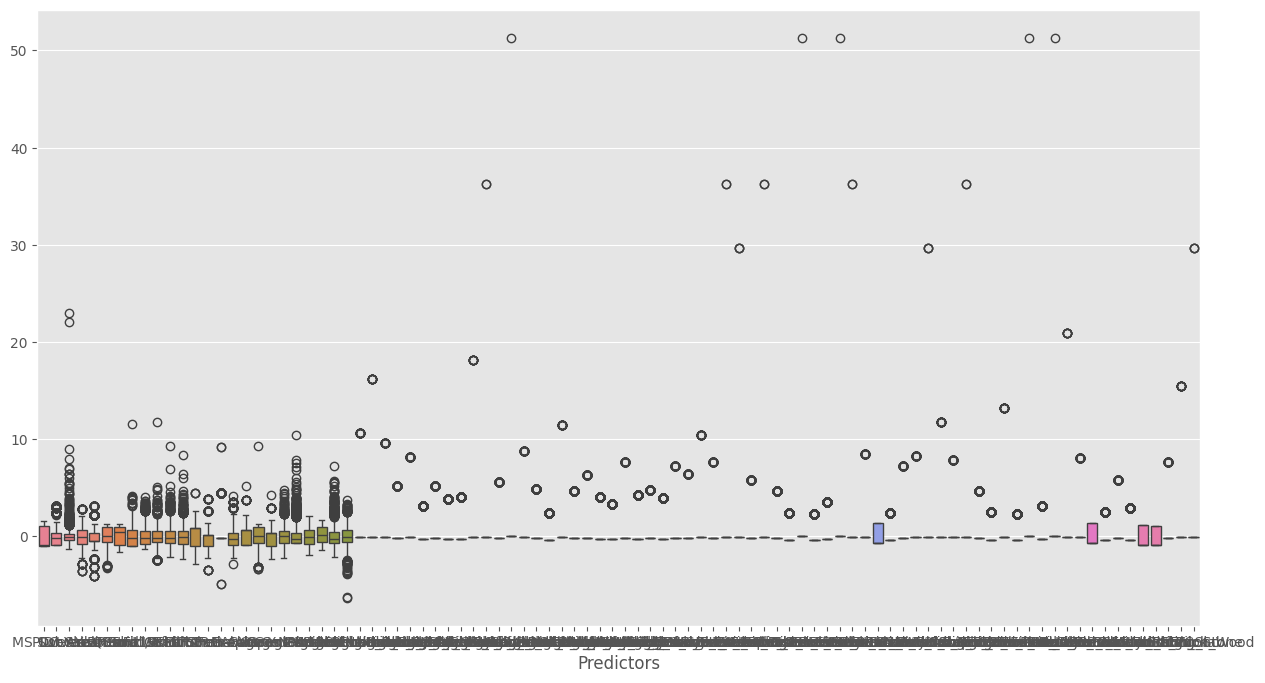

In [85]:
# Boxplot of scaled data
plt.figure(figsize=(15, 8))
sns.boxplot(data=scaled_df, orient='v')
plt.xlabel('Predictors')
plt.xticks()
plt.show()

In [86]:
# Separate target and features (replace 'Price' with your target column)
X = project2_cleaned1.drop(columns=['SalePrice'])  # Features
y = project2_cleaned1['SalePrice']  # Target

# Separate numeric and categorical columns
numeric_cols = X.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = X.select_dtypes(include=['object']).columns

# Instantiate the scalers and encoder
scaler = StandardScaler()  # For numeric columns
encoder = OneHotEncoder(sparse_output=False)  # For categorical columns

# Define the column transformer for numeric and categorical transformations
preprocessor = ColumnTransformer(
    transformers=[
        ('num', scaler, numeric_cols),        # Apply StandardScaler to numeric columns
        ('cat', encoder, categorical_cols)    # Apply OneHotEncoder to categorical columns
    ]
)

# Apply scaling and encoding through a pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

# Fit and transform the data using the pipeline
X_scaled = pipeline.fit_transform(X)

#Now, get feature names after encoding (this needs to be done after the pipeline is fitted)
# Access the OneHotEncoder inside the pipeline after fitting
# Convert the scaled data back into a DataFrame
# Get feature names after encoding (one-hot encoding creates new column names)
encoder_fitted = pipeline.named_steps['preprocessor'].transformers_[1][1]  # Access fitted encoder from the preprocessor
encoded_columns = encoder_fitted.get_feature_names_out(categorical_cols)



scaled_project2 = pd.DataFrame(X_scaled, columns=numeric_cols.tolist() + encoded_columns.tolist())

# Show the scaled dataframe
scaled_project2

,PID,MS SubClass,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,BsmtFin SF 1,Bsmt Unf SF,Total Bsmt SF,...,Exterior 2nd_Stucco,Exterior 2nd_VinylSd,Exterior 2nd_Wd Sdng,Exterior 2nd_Wd Shng,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood
0,1.012735,-0.879022,0.630605,-1.487327,-2.297890,-0.241516,-0.966792,0.165927,-0.476303,-0.093676,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1.012736,0.768028,0.110387,-1.487327,-0.509134,-0.142487,-0.823282,-0.975094,-1.274108,-2.432676,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1.004008,-0.173143,-0.155209,-0.069929,0.385245,-1.132778,-1.636506,-0.975094,0.514075,-0.617332,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,-0.957746,0.062149,-0.395595,1.347470,-0.509134,0.946834,0.755330,0.101425,-0.148470,-0.163497,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,1.034731,0.297442,-0.422140,0.638771,3.068379,-1.165788,1.090187,-0.196620,-1.274108,-1.129352,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2630,1.002826,-0.173143,-0.564503,-0.069929,0.385245,-1.231807,-1.636506,-0.975094,0.596606,-0.533547,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2631,1.018564,0.532735,0.108459,0.638771,0.385245,0.616737,0.324800,0.048044,-0.568005,0.020365,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2632,-0.957698,1.473907,-0.929011,1.347470,-0.509134,0.319649,-0.153568,1.160150,-0.664291,0.420672,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2633,-0.988840,-0.879022,0.013847,-0.069929,-0.509134,0.088581,-0.488425,-0.975094,1.165157,0.043639,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


### Fit & Assess Our Model

###Linear Regression

In [87]:
scaled_project2.info()
#log sales price i think is what we want to use in the regression

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2635 entries, 0 to 2634
Data columns (total 91 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   PID                   2635 non-null   float64
 1   MS SubClass           2635 non-null   float64
 2   Lot Area              2635 non-null   float64
 3   Overall Qual          2635 non-null   float64
 4   Overall Cond          2635 non-null   float64
 5   Year Built            2635 non-null   float64
 6   Year Remod/Add        2635 non-null   float64
 7   BsmtFin SF 1          2635 non-null   float64
 8   Bsmt Unf SF           2635 non-null   float64
 9   Total Bsmt SF         2635 non-null   float64
 10  1st Flr SF            2635 non-null   float64
 11  Gr Liv Area           2635 non-null   float64
 12  Full Bath             2635 non-null   float64
 13  Bedroom AbvGr         2635 non-null   float64
 14  Kitchen AbvGr         2635 non-null   float64
 15  TotRms AbvGrd        

####Scale: StdScaler

In [88]:

X = scaled_project2.drop(columns=['Log Sales Price'])  # Features
y = scaled_project2['Log Sales Price']  # Target

#normalize the features
scaler = StandardScaler()
scaler.fit_transform(X)

array([[ 1.01273496, -0.87902231,  0.6306047 , ..., -0.13031447,
        -0.06474622, -0.03376119],
       [ 1.01273634,  0.76802833,  0.11038673, ...,  7.67374509,
        -0.06474622, -0.03376119],
       [ 1.00400756, -0.17314346, -0.15520917, ..., -0.13031447,
        -0.06474622, -0.03376119],
       ...,
       [-0.95769822,  1.47390717, -0.92901116, ..., -0.13031447,
        -0.06474622, -0.03376119],
       [-0.98884045, -0.87902231,  0.01384685, ..., -0.13031447,
        -0.06474622, -0.03376119],
       [-0.98398675,  0.06214948,  0.35789066, ..., -0.13031447,
        -0.06474622, -0.03376119]])

In [89]:
X.columns

Index(['PID', 'MS SubClass', 'Lot Area', 'Overall Qual', 'Overall Cond',
       'Year Built', 'Year Remod/Add', 'BsmtFin SF 1', 'Bsmt Unf SF',
       'Total Bsmt SF', '1st Flr SF', 'Gr Liv Area', 'Full Bath',
       'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd', 'Fireplaces',
       'Garage Yr Blt', 'Garage Cars', 'Garage Area', 'Open Porch SF',
       'Mo Sold', 'Yr Sold', 'Neighborhood_Blmngtn', 'Neighborhood_Blueste',
       'Neighborhood_BrDale', 'Neighborhood_BrkSide', 'Neighborhood_ClearCr',
       'Neighborhood_CollgCr', 'Neighborhood_Crawfor', 'Neighborhood_Edwards',
       'Neighborhood_Gilbert', 'Neighborhood_Greens', 'Neighborhood_GrnHill',
       'Neighborhood_IDOTRR', 'Neighborhood_Landmrk', 'Neighborhood_MeadowV',
       'Neighborhood_Mitchel', 'Neighborhood_NAmes', 'Neighborhood_NPkVill',
       'Neighborhood_NWAmes', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt',
       'Neighborhood_OldTown', 'Neighborhood_SWISU', 'Neighborhood_Sawyer',
       'Neighborhood_Sawyer

In [90]:
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state=5)

In [91]:
X.head()

,PID,MS SubClass,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,BsmtFin SF 1,Bsmt Unf SF,Total Bsmt SF,...,Exterior 2nd_Stucco,Exterior 2nd_VinylSd,Exterior 2nd_Wd Sdng,Exterior 2nd_Wd Shng,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood
0,1.012735,-0.879022,0.630605,-1.487327,-2.297890,-0.241516,-0.966792,0.165927,-0.476303,-0.093676,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1.012736,0.768028,0.110387,-1.487327,-0.509134,-0.142487,-0.823282,-0.975094,-1.274108,-2.432676,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1.004008,-0.173143,-0.155209,-0.069929,0.385245,-1.132778,-1.636506,-0.975094,0.514075,-0.617332,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,-0.957746,0.062149,-0.395595,1.347470,-0.509134,0.946834,0.755330,0.101425,-0.148470,-0.163497,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,1.034731,0.297442,-0.422140,0.638771,3.068379,-1.165788,1.090187,-0.196620,-1.274108,-1.129352,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [92]:
X_scaled.head()

,PID,MS SubClass,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,BsmtFin SF 1,Bsmt Unf SF,Total Bsmt SF,...,Exterior 2nd_Stucco,Exterior 2nd_VinylSd,Exterior 2nd_Wd Sdng,Exterior 2nd_Wd Shng,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood
0,1.012735,-0.879022,0.630605,-1.487327,-2.297890,-0.241516,-0.966792,0.165927,-0.476303,-0.093676,...,-0.124154,-0.723880,-0.393305,-0.172334,-0.342743,1.166667,-0.903321,-0.130314,-0.064746,-0.033761
1,1.012736,0.768028,0.110387,-1.487327,-0.509134,-0.142487,-0.823282,-0.975094,-1.274108,-2.432676,...,-0.124154,-0.723880,-0.393305,-0.172334,-0.342743,-0.857143,-0.903321,7.673745,-0.064746,-0.033761
2,1.004008,-0.173143,-0.155209,-0.069929,0.385245,-1.132778,-1.636506,-0.975094,0.514075,-0.617332,...,-0.124154,-0.723880,2.542556,-0.172334,-0.342743,-0.857143,1.107026,-0.130314,-0.064746,-0.033761
3,-0.957746,0.062149,-0.395595,1.347470,-0.509134,0.946834,0.755330,0.101425,-0.148470,-0.163497,...,-0.124154,1.381444,-0.393305,-0.172334,-0.342743,-0.857143,1.107026,-0.130314,-0.064746,-0.033761
4,1.034731,0.297442,-0.422140,0.638771,3.068379,-1.165788,1.090187,-0.196620,-1.274108,-1.129352,...,-0.124154,-0.723880,2.542556,-0.172334,-0.342743,-0.857143,1.107026,-0.130314,-0.064746,-0.033761


In [93]:
scaleddata= X_scaled.transpose()
scaleddata

,0,1,2,3,4,5,6,7,8,9,...,2625,2626,2627,2628,2629,2630,2631,2632,2633,2634
PID,1.012735,1.012736,1.004008,-0.957746,1.034731,1.012752,1.019576,1.014462,1.024138,0.998427,...,1.023513,1.024281,1.034732,-0.951615,-0.946019,1.002826,1.018564,-0.957698,-0.988840,-0.983987
MS SubClass,-0.879022,0.768028,-0.173143,0.062149,0.297442,-0.879022,-0.879022,-0.173143,0.062149,-0.408436,...,-0.879022,0.062149,0.297442,0.532735,-0.879022,-0.173143,0.532735,1.473907,-0.879022,0.062149
Lot Area,0.630605,0.110387,-0.155209,-0.395595,-0.422140,-0.226242,-0.405234,1.739998,0.039947,-0.689070,...,0.120471,-0.099599,-0.493321,-0.152243,-0.303504,-0.564503,0.108459,-0.929011,0.013847,0.357891
Overall Qual,-1.487327,-1.487327,-0.069929,1.347470,0.638771,-0.778628,0.638771,-0.069929,0.638771,-0.069929,...,-0.778628,0.638771,-0.069929,-0.069929,-0.778628,-0.069929,0.638771,1.347470,-0.069929,0.638771
Overall Cond,-2.297890,-0.509134,0.385245,-0.509134,3.068379,-0.509134,-0.509134,1.279623,-0.509134,1.279623,...,-0.509134,-0.509134,1.279623,1.279623,-0.509134,0.385245,0.385245,-0.509134,-0.509134,-0.509134
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Foundation_CBlock,1.166667,-0.857143,-0.857143,-0.857143,-0.857143,1.166667,-0.857143,-0.857143,-0.857143,-0.857143,...,-0.857143,-0.857143,-0.857143,1.166667,1.166667,-0.857143,-0.857143,1.166667,1.166667,-0.857143
Foundation_PConc,-0.903321,-0.903321,1.107026,1.107026,1.107026,-0.903321,1.107026,-0.903321,1.107026,-0.903321,...,1.107026,1.107026,-0.903321,-0.903321,-0.903321,1.107026,1.107026,-0.903321,-0.903321,1.107026
Foundation_Slab,-0.130314,7.673745,-0.130314,-0.130314,-0.130314,-0.130314,-0.130314,-0.130314,-0.130314,-0.130314,...,-0.130314,-0.130314,-0.130314,-0.130314,-0.130314,-0.130314,-0.130314,-0.130314,-0.130314,-0.130314
Foundation_Stone,-0.064746,-0.064746,-0.064746,-0.064746,-0.064746,-0.064746,-0.064746,-0.064746,-0.064746,-0.064746,...,-0.064746,-0.064746,-0.064746,-0.064746,-0.064746,-0.064746,-0.064746,-0.064746,-0.064746,-0.064746


In [94]:
# Fit a linear model using Sklearn
model = LinearRegression()
my_fit_lr = model.fit(X_train, y_train)

In [95]:
# Create a data frame with the results from the linear regression models
model_results = pd.DataFrame()
model_results['Predictor'] = X_train.columns
model_results['Linear'] = my_fit_lr.coef_
model_results.sort_values(by=['Linear'],inplace=True, ascending=False)
model_results

,Predictor,Linear
3,Overall Qual,0.275633
11,Gr Liv Area,0.263382
5,Year Built,0.183514
4,Overall Cond,0.152506
9,Total Bsmt SF,0.120623
...,...,...
36,Neighborhood_MeadowV,-0.059849
34,Neighborhood_IDOTRR,-0.068275
51,Exterior 1st_AsbShng,-0.069875
56,Exterior 1st_CemntBd,-0.070508


In [96]:

# Define RMSPE as a custom scoring function
def rmspe(y_true, y_pred):
    # Avoid division by zero errors by adding a small epsilon
    epsilon = 1e-10
    return np.sqrt(np.mean(((y_true - y_pred) / (y_true + epsilon)) ** 2))

# Create a custom scorer
rmspe_scorer = make_scorer(rmspe, greater_is_better=False)

# Initialize your linear regression model
model = LinearRegression()

# Perform cross-validation with 10 folds and RMSPE as the scoring metric
results = cross_val_score(
    model,
    X_scaled,  # Ensure X_scaled is your scaled feature matrix
    y,         # Ensure y is your target variable
    scoring=rmspe_scorer,  # Use custom RMSPE scorer
    cv=10      # 10-fold cross-validation
)

# Calculate the RMSPE for cross-validation results
mean_rmspe = abs(results.mean())  # Take the absolute value to ensure positive results
print(f"CV RMSPE: {mean_rmspe}")

CV RMSPE: 4.519831463448347


### Regularization

####Ridge *Regression*

In [97]:
# Train the model
my_fit_rr = Ridge(alpha = 1) # Arbitrarily choosing alpha = 1
my_fit_rr.fit(X_train, y_train) ;

In [98]:
# Calculate RMSPE
y_pred = my_fit_rr.predict(X_test)

rmspe=np.sqrt(np.mean(((y_test - y_pred) / (y_test)) ** 2))
print(f"CV RMSPE: {rmspe}")

CV RMSPE: 4.034444859424429


Let's try looking at different values of $\alpha$.

In [99]:
# Specify values of alpha we want to try
alph = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1e-1, 1, 2, 3, 4, 5, 10, 20, 30, 50]

# Create empty list to hold results
results_alpha = []

for i in alph:
  # Train the model
  my_fit_rr = Ridge(alpha = i) # Looping through alpha
  my_fit_rr.fit(X_train, y_train)

  # Calculate RMSPE
  y_pred = my_fit_rr.predict(X_test)

  rmspe=np.sqrt(np.mean(((y_test - y_pred) / (y_test)) ** 2))

  results_alpha.append(rmspe)

results_df = pd.DataFrame({'Alpha': alph, 'RMSPE': results_alpha})
print(results_df.sort_values(by=['RMSPE']))

           Alpha     RMSPE
15  5.000000e+01  4.024768
14  3.000000e+01  4.029581
13  2.000000e+01  4.031425
12  1.000000e+01  4.032992
11  5.000000e+00  4.033762
10  4.000000e+00  4.033925
9   3.000000e+00  4.034092
8   2.000000e+00  4.034265
7   1.000000e+00  4.034445
6   1.000000e-01  4.034614
5   1.000000e-02  4.034632
4   1.000000e-03  4.034633
3   1.000000e-04  4.034634
2   1.000000e-08  4.034634
0   1.000000e-15  4.034634
1   1.000000e-10  4.034634


looks like 50 give us the smallest RMSE value

In [100]:
## Retrain the model w/ alpha = 50
my_fit_rr3 = Ridge(alpha = 50)
my_fit_rr3.fit(X_train, y_train)

## Calculate RMSPE
y_pred = my_fit_rr.predict(X_test)

rmspe=np.sqrt(np.mean(((y_test - y_pred) / (y_test)) ** 2))
print(f"CV RMSPE: {rmspe}")

CV RMSPE: 4.024767573504575


In [101]:
# Add ridge regression results to data frame we created earlier
model_results['Ridge'] = my_fit_rr.coef_

In [102]:
model_results

,Predictor,Linear,Ridge
3,Overall Qual,0.275633,0.028348
11,Gr Liv Area,0.263382,-0.045351
5,Year Built,0.183514,0.032573
4,Overall Cond,0.152506,0.267978
9,Total Bsmt SF,0.120623,0.145746
...,...,...,...
36,Neighborhood_MeadowV,-0.059849,-0.013319
34,Neighborhood_IDOTRR,-0.068275,0.033561
51,Exterior 1st_AsbShng,-0.069875,-0.036141
56,Exterior 1st_CemntBd,-0.070508,0.011822


Minor reduction in RMSPE


#### Lasso *Regression*

In [103]:
# Specify values of alpha we want to try
alph = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1e-1, 1, 2, 3, 4, 5, 10, 20, 30, 50]

# Create empty list to hold results
results_alpha = []

for i in alph:
  # Train the model
  my_fit_lasso = Lasso(alpha = i, tol = .01, max_iter=100_000) # Looping through alpha
  my_fit_lasso.fit(X_train, y_train)

  # Calculate RMSPE
  y_pred = my_fit_rr.predict(X_test)

  rmspe=np.sqrt(np.mean(((y_test - y_pred) / (y_test)) ** 2))

  results_alpha.append(rmspe)

results_df = pd.DataFrame({'Alpha': alph, 'RMSPE': results_alpha})
print(results_df.sort_values(by=['RMSPE']))

           Alpha     RMSPE
0   1.000000e-15  4.024768
1   1.000000e-10  4.024768
2   1.000000e-08  4.024768
3   1.000000e-04  4.024768
4   1.000000e-03  4.024768
5   1.000000e-02  4.024768
6   1.000000e-01  4.024768
7   1.000000e+00  4.024768
8   2.000000e+00  4.024768
9   3.000000e+00  4.024768
10  4.000000e+00  4.024768
11  5.000000e+00  4.024768
12  1.000000e+01  4.024768
13  2.000000e+01  4.024768
14  3.000000e+01  4.024768
15  5.000000e+01  4.024768


In [104]:
results_df

,Alpha,RMSPE
0,1.000000e-15,4.024768
1,1.000000e-10,4.024768
2,1.000000e-08,4.024768
3,1.000000e-04,4.024768
4,1.000000e-03,4.024768
5,1.000000e-02,4.024768
6,1.000000e-01,4.024768
7,1.000000e+00,4.024768
8,2.000000e+00,4.024768
9,3.000000e+00,4.024768


1e-15 gives us the lowest RMSPE

In [105]:
# Retrain the model
my_fit_lasso = Lasso(alpha = 1e-15, tol = .01, max_iter=1000000)
my_fit_lasso.fit(X_train, y_train)

# Perform cross-validation with 10 folds and RMSPE as the scoring metric
results = cross_val_score(
    my_fit_lasso,
    X_scaled,  # Ensure X_scaled is your scaled feature matrix
    y,         # Ensure y is your target variable
    scoring=rmspe_scorer,  # Use custom RMSPE scorer
    cv=10      # 10-fold cross-validation
)

## Calculate RMSPE
y_pred = my_fit_rr.predict(X_test)

rmspe=np.sqrt(np.mean(((y_test - y_pred) / (y_test)) ** 2))
print(f"CV RMSPE: {rmspe}")

CV RMSPE: 4.024767573504575


In [106]:
# Add Lasso results to the data frame we created before
model_results['Lasso'] = my_fit_lasso.coef_
model_results

,Predictor,Linear,Ridge,Lasso
3,Overall Qual,0.275633,0.028348,0.042760
11,Gr Liv Area,0.263382,-0.045351,-0.052750
5,Year Built,0.183514,0.032573,0.034752
4,Overall Cond,0.152506,0.267978,0.275633
9,Total Bsmt SF,0.120623,0.145746,0.152506
...,...,...,...,...
36,Neighborhood_MeadowV,-0.059849,-0.013319,-0.028940
34,Neighborhood_IDOTRR,-0.068275,0.033561,0.015722
51,Exterior 1st_AsbShng,-0.069875,-0.036141,-0.039737
56,Exterior 1st_CemntBd,-0.070508,0.011822,0.011380


In [107]:
print(model_results.columns)

Index(['Predictor', 'Linear', 'Ridge', 'Lasso'], dtype='object')


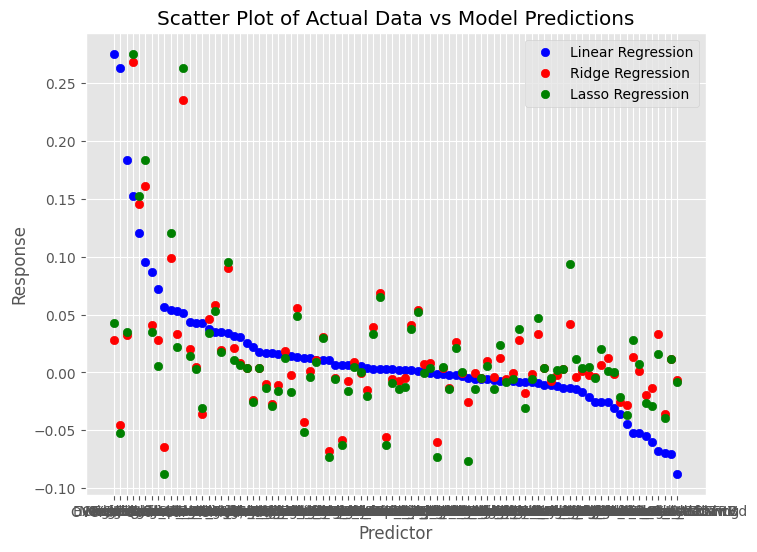

In [109]:
model_plot = pd.DataFrame(model_results)

# Create a scatter plot
plt.figure(figsize=(8, 6))

# Plot original data (scatter plot)

plt.scatter(model_plot['Predictor'], model_plot['Linear'], color='blue', label='Linear Regression')
plt.scatter(model_plot['Predictor'], model_plot['Ridge'], color='red', label='Ridge Regression')
plt.scatter(model_plot['Predictor'], model_plot['Lasso'], color='green', label='Lasso Regression')

# Set labels and title
# Adding labels and title
plt.xlabel('Predictor')
plt.ylabel('Response')
plt.title('Scatter Plot of Actual Data vs Model Predictions')

# Show legend
plt.legend()

# Show the plot
plt.show()

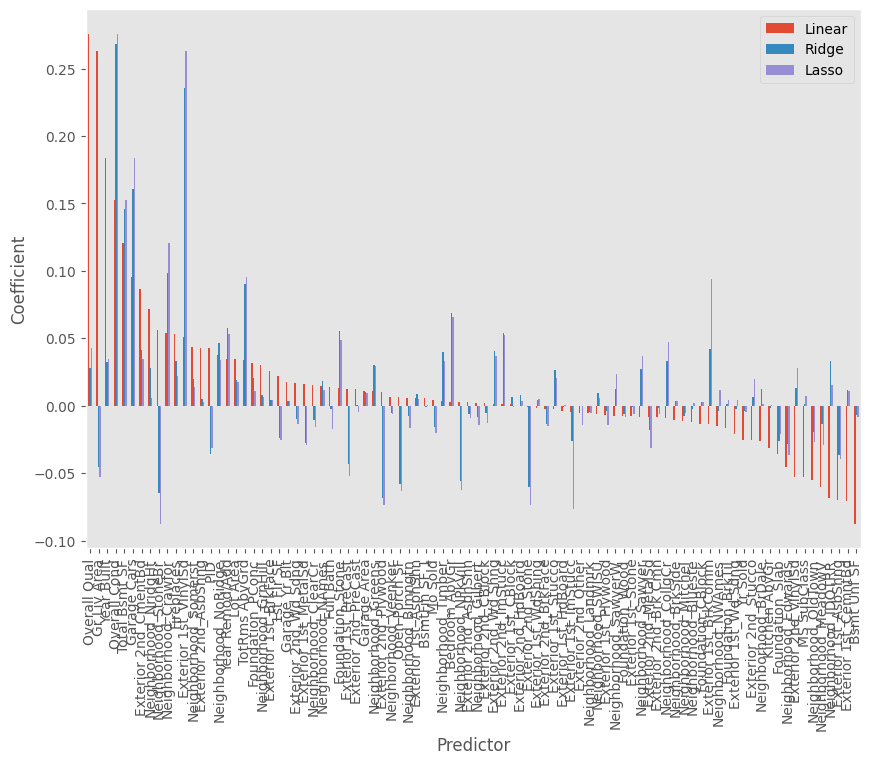

In [110]:
# Plot results
fig, ax = plt.subplots(1,1, figsize = (10,7))
model_results.plot(x = 'Predictor', kind = 'bar', ax = ax)
ax.set_ylabel('Coefficient')
plt.grid()

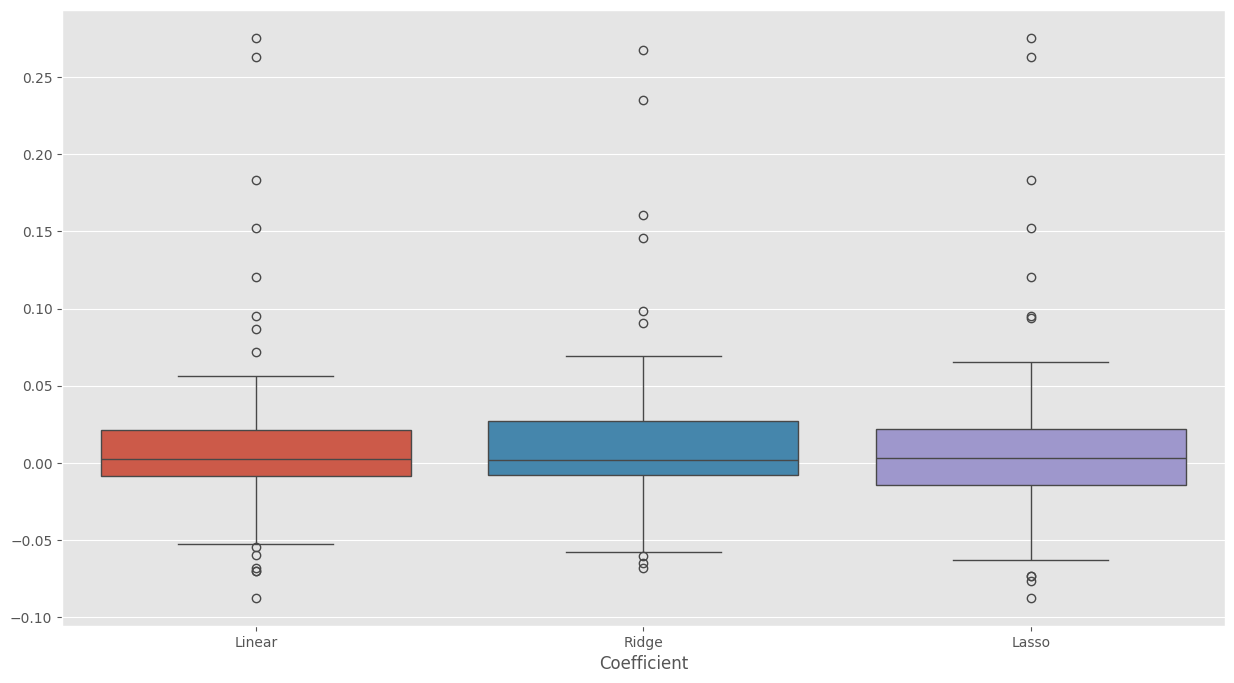

In [111]:
# Boxplot for a random column
plt.figure(figsize=(15, 8))
sns.boxplot(data=model_results, orient='v')
plt.xlabel('Coefficient')
plt.xticks()
plt.show()

## Conclusion

### Important features

There were quite a few features we were able to remove. First I check for Nulls and found a large number of them. For all comumns where greater then 50% of the values were null I simply removed them.
I was able to determine there were a number or columns where there was >50% ov the values were zero. As such I was able to remove these columns as well becuase they would likely not contribute to the model.
I also found that there were a number of columns where most of the values were the same as such we would like obtain no predictive value from these.
### Model performance

- Using linear regression we need numerical values. Thus some of our values that are categorical need to be adjusted. We used onehot encoding in order to create binary values for our categorical features.
- We also need to scale our data so that it can be directly compared for our predictive model.
- When trying to calculate the RMSPE i found it difficult to find an equation for the this specific type of error. I was able to find a thread for creating an equation using sikit scorer metric. This would allow me to find the RMSPE for the crossvalidation.
- I was able to reduce the RMSPE the most with the Lasso Regression from 4.5 to 4.02

NOTE: My correlation could have hinted at more columns removal.
